# Imports

In [23]:
import natasha
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import sent_tokenize


# Natural Language Processing. Lab 1
Professor: Vladimir Ivanov

Teaching Assistant: Aidar Valeev


## Task 1
Write a python program that does the following :
1. retrieve content of a wikipedia page on a topic of your choice - english 
2. retrieve content of a wikipedia page on a topic of your choice - language of your choice (i.e russian, french)
3. preprocess the data 
4. print distinct words statatistics, number of chapters, number of sentences, numerical values, number of entities with links

In [20]:
class NatashaTokenizer():
    # stop_words = stopwords.words('russian')
    stop_words = ['.', ',', '"', '!', "''", '%', '«', '»', '“', '”', ':', '№', '=',
                '?', '(', ')', '-', '``', '@', '#', "'", '—', '/', '+', '&', '*',
                ':', ';', '_', '\\', '...', '\n', '$', '[', ']', '>', '<', '..']

    stop_tags = ['PUNCT', 'NUM']

    def __init__(self):
        self.segmenter = natasha.Segmenter()
        nat_emb = natasha.NewsEmbedding()
        self.morph_tagger = natasha.NewsMorphTagger(nat_emb)
        self.morph_vocab = natasha.MorphVocab()

    def tokenize(self, text, remove_numbers=True):
        try:
            doc = natasha.Doc(text)
            doc.segment(self.segmenter)
            doc.tag_morph(self.morph_tagger)
            for token in doc.tokens:
                token.lemmatize(self.morph_vocab)

            def check(token):
                if token.pos in self.stop_tags:
                    return False
                if token.lemma in self.stop_words:
                    return False
                if len(token.lemma) < 3:
                    return False
                if re.search('\d', token.lemma) and remove_numbers:
                    return False
                return True

            tokens = [token.lemma for token in doc.tokens if check(token)]
        
        except:
            tokens = []

        return tokens

    def count_numerical(self, text):
        try:
            doc = natasha.Doc(text)
            doc.segment(self.segmenter)
            doc.tag_morph(self.morph_tagger)
            for token in doc.tokens:
                token.lemmatize(self.morph_vocab)

            def check(token):
                if token.pos in self.stop_tags:
                    return False

            counter = 0

            for token in doc.tokens:
                if token.pos == 'NUM':
                    counter += 1
        
        except:
            return 0

        return counter

tokenizer = NatashaTokenizer()

In [4]:
english_text = '''Extreme skiing is performed on long, steep (typically from 45 to 60+ degrees, or grades of 100 to 170 percent) slopes in mountainous terrain. The French coined the term 'Le Ski Extreme' in the 1970s. The first practitioners include Swiss skier Sylvain Saudan,[2] who invented the "windshield wiper" turn in the mid-1960s, and in 1967 made the first descents of slopes in the Swiss, French and Italian Alps that were previously considered impossible.[3] Saudan's 'first descent' in America was at Mt. Hood March 3, 1971. Early American practitioners include Bill Briggs, who descended Grand Teton on June 15, 1971.[4] The Frenchmen Patrick Vallençant, Jean-Marc Boivin and Anselme Baud and the Italians Stefano De Benedetti and Toni Valeruz were among those who further developed the art and brought notoriety to the sport in the 1970s and 1980s.

Tuckerman's Ravine, found on Mount Washington in New Hampshire, is a popular location for extreme skiing in North America.
The key North American skiers who popularized the sport include: Doug Coombs, Shane McConkey, Seth Morrison, David W. Kraft, Glen Plake and Scot Schmidt, known as The Extreme-6 and all considered among the top extreme skiers in the world during their prime.[5]

Because of the extremely long, steep slopes, and dangerous terrain, single mistakes at the wrong moment by some extreme skiers have led to them being seriously injured or killed.[6]

Extreme skiing in the U.S. took off in the mid-1980s after the movie Maltese Flamingo came out in 1986, and John Cummings’ book, Hallowed Be the Extreme, documented the lifestyle of extreme skiers.[7][8]'''

In [10]:
english_tokens = tokenizer.tokenize(english_text)

I tokenized text via `natasha` library.

In [33]:
english_tokens[:10]

['extreme',
 'skiing',
 'performed',
 'long',
 'steep',
 'typically',
 'from',
 'degrees',
 'grades',
 'percent']

Let's count words' statisitics:

In [13]:
english_stat = {}

for token in english_tokens:
    try:
        english_stat[token] += 1
    except KeyError:
        english_stat[token] = 1

english_stat

{'extreme': 8,
 'skiing': 3,
 'performed': 1,
 'long': 2,
 'steep': 2,
 'typically': 1,
 'from': 1,
 'degrees': 1,
 'grades': 1,
 'percent': 1,
 'slopes': 3,
 'mountainous': 1,
 'terrain': 2,
 'the': 25,
 'french': 2,
 'coined': 1,
 'term': 1,
 'ski': 1,
 'first': 3,
 'practitioners': 2,
 'include': 3,
 'swiss': 2,
 'skier': 1,
 'sylvain': 1,
 'saudan': 2,
 'who': 4,
 'invented': 1,
 'windshield': 1,
 'wiper': 1,
 'turn': 1,
 'and': 11,
 'made': 1,
 'descents': 1,
 'italian': 1,
 'alps': 1,
 'that': 1,
 'were': 2,
 'previously': 1,
 'considered': 2,
 'impossible': 1,
 'descent': 1,
 'america': 2,
 'was': 1,
 'hood': 1,
 'march': 1,
 'early': 1,
 'american': 2,
 'bill': 1,
 'briggs': 1,
 'descended': 1,
 'grand': 1,
 'teton': 1,
 'june': 1,
 'frenchmen': 1,
 'patrick': 1,
 'vallençant': 1,
 'jean-marc': 1,
 'boivin': 1,
 'anselme': 1,
 'baud': 1,
 'italians': 1,
 'stefano': 1,
 'benedetti': 1,
 'toni': 1,
 'valeruz': 1,
 'among': 2,
 'those': 1,
 'further': 1,
 'developed': 1,
 'art': 1

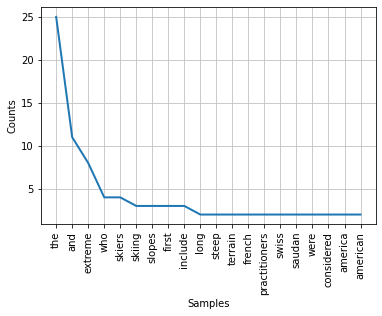

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
nltk_eng_stat = nltk.FreqDist(english_stat)
nltk_eng_stat.plot(20)

Number of sentences:

In [19]:
len(sent_tokenize(english_text))

12

I emplented method in `NatashaTokenizer` class which counts tokens with **NUM** (numerical) tags.

In [21]:
tokenizer.count_numerical(english_text)

18

## Task 2

Write a python program that does the following :
1. Retrieve data from sklearn --> (from sklearn.datasets import fetch_20newsgroups)
2. Preprocess the data 
3. Do classification using any classical machine learning method

In [34]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

Let's use **TF-IDF** and **Naive Bayes** for classification.

In [27]:
train = fetch_20newsgroups(random_state=42)
test = fetch_20newsgroups(subset='test', random_state=42)

In [30]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])

In [31]:
text_clf = text_clf.fit(train.data, train.target)

In [36]:
predicted = text_clf.predict(test.data)
np.mean(predicted == test.target)

0.7738980350504514

## Task 3

Write a python program that does the following :
1. Preprocess the given data
2. Find entities in the data using regular expressions: dates, names, locations
3. Anonymise the names of US presidents
4. Highlight the locations
5. Sort by dates

In [48]:
from nltk import pos_tag
from nltk import word_tokenize

In [44]:
TEXT = [
    "Barack Obama was the 44th president of the US and he followed George W. Bush and was followed by Donald Trump in 2017",
    "As a young man, George H.W. Bush served in World War II as a fighter pilot. In 1944, he was shot down and had to parachute to safety.",
    "Before he was president, George W. Bush was a cheerleader, a fraternity brother, an oilman, an owner of a professional baseball team, and a governor. After leaving office in 2009, Bush learned to paint.",
    "Here's something else you probably didn't know about John Adams: He died on the Fourth of July. And he wasn't the only commander in chief to do so. In fact, three of the nation's five founding fathers—Adams, Thomas Jefferson, and James Monroe—died on Independence Day. Adams and Jefferson even passed on the same exact day: July 4, 1826, which happened to be the 50th anniversary of the adoption of the Declaration of Independence.",
    "At 6 feet 4 inches tall, Abraham Lincoln and Lyndon B. Johnson were America's tallest presidents. But what about America's shortest president? That distinction goes to founding father James Madison (1809-1817), who, at 5 feet 4 inches tall, was a full foot shorter than his tallest peers.",
    "That changed, however, in October 1860, when Lincoln received a letter from an 11-year-old girl named Grace Bedell. 'If you will let your whiskers grow I will try and get [my brothers] to vote for you,' Bedell wrote to Lincoln. 'You would look a great deal better for your face is so thin. All the ladies like whiskers and they would tease their husbands to vote for you and then you would be president.'",
    "Richard Nixon was hardly the first president who liked to unwind by rolling a few strikes. Harry S. Truman also enjoyed bowling, and opened the first White House bowling alley in 1947. ",
    "If you had to bet on which U.S. president was the biggest movie fan, you'd probably put your money on America's actor-turned-president, Ronald Reagan (1981-1989). And that would be a great guess. Reagan reportedly watched 363 movies during his two terms in office.",
    "Thomas Jefferson offered to sell his personal library when the Library of Congress was burned by the British during the War of 1812. He sold them 6487 books from his own collection, the largest in America at the time.",
    "Born in New York in 1782, Martin Van Buren was the first president to have been born after the American Revolution, technically making him the first American-born president.",
    "Benjamin Harrison had a tight-knit family and loved to amuse and dote on his grandchildren. He put up the first recorded White House Christmas tree in 1889, and was known to put on the Santa suit for entertainment.",
    "A 16-year-old Bill Clinton managed to shake hands with President John F. Kennedy at a Boys Nation event in 1963. This would take place just four months before Kennedy's assassination.",
    "In 1993—two years before he became the governor of Texas—George W. Bush ran the Houston marathon, finishing with a time of 3:44:52. He is the only president to have ever run a marathon.",
]

In [47]:
text = TEXT[0]
tokenizer = word_tokenize(text)
pos_tag(tokenizer)

[('Barack', 'NNP'),
 ('Obama', 'NNP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('44th', 'JJ'),
 ('president', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('US', 'NNP'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('followed', 'VBD'),
 ('George', 'NNP'),
 ('W.', 'NNP'),
 ('Bush', 'NNP'),
 ('and', 'CC'),
 ('was', 'VBD'),
 ('followed', 'VBN'),
 ('by', 'IN'),
 ('Donald', 'NNP'),
 ('Trump', 'NNP'),
 ('in', 'IN'),
 ('2017', 'CD')]

`nltk` can't distinguish between names and locations.

In [50]:
names_locations = []
dates = []

for text in TEXT:
    tokenizer = word_tokenize(text)
    tagged_tokens = pos_tag(tokenizer)
    names_locations_ = []
    dates_ = []

    for token, tag in tagged_tokens:
        if tag == 'NNP':
            names_locations_.append(token)
        elif tag == 'CD':
            dates_.append(token)

    names_locations.append(names_locations_)
    dates.append(dates_)

In [51]:
names_locations

[['Barack', 'Obama', 'US', 'George', 'W.', 'Bush', 'Donald', 'Trump'],
 ['George', 'H.W', 'Bush', 'World', 'War', 'II'],
 ['George', 'W.', 'Bush', 'Bush'],
 ['John',
  'Adams',
  'Fourth',
  'July',
  'Thomas',
  'Jefferson',
  'James',
  'Monroe—died',
  'Independence',
  'Day',
  'Adams',
  'Jefferson',
  'July',
  'Declaration',
  'Independence'],
 ['Abraham',
  'Lincoln',
  'Lyndon',
  'B.',
  'Johnson',
  'America',
  'America',
  'James',
  'Madison'],
 ['October', 'Lincoln', 'Grace', 'Bedell', 'Bedell', 'Lincoln'],
 ['Richard', 'Nixon', 'Harry', 'S.', 'Truman', 'White', 'House'],
 ['U.S.', 'America', 'Ronald', 'Reagan', 'Reagan'],
 ['Thomas', 'Jefferson', 'Library', 'Congress', 'War', 'America'],
 ['Born',
  'New',
  'York',
  'Martin',
  'Van',
  'Buren',
  'Revolution',
  'American-born'],
 ['Benjamin', 'Harrison', 'White', 'House', 'Christmas', 'Santa'],
 ['Bill',
  'Clinton',
  'President',
  'John',
  'F.',
  'Kennedy',
  'Boys',
  'Nation',
  'Kennedy'],
 ['Texas—George', 

In [52]:
dates

[['2017'],
 ['1944'],
 ['2009'],
 ['three', 'five', '4', '1826'],
 ['6', '4', '5', '4'],
 ['1860'],
 ['1947'],
 ['363', 'two'],
 ['1812', '6487'],
 ['1782'],
 ['1889'],
 ['1963', 'four'],
 ['1993—two', '3:44:52']]

## Task 4

Write a python program that does the following :
1. Preprocess the data from Task 3
2. Find entities in the data using [Gazetteers](https://gatenlp.readthedocs.io/en/latest/gazetteers/) from gatenlp: dates, names, locations
3. Anonymise the names of US presidents
4. Highlight the locations
5. Sort by dates
